In [1]:
import pandas as pd
import itertools
import time

In [ ]:
data = pd.read_csv('static/data//data.csv')

In [2]:
data = pd.read_csv('static/data//new_data.csv')

array([[<Axes: title={'center': 'receipt_number'}>]], dtype=object)

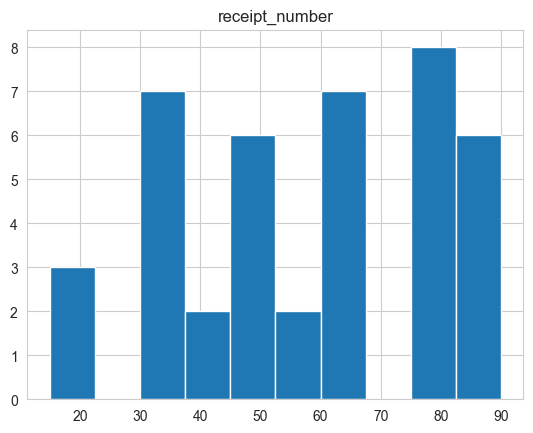

In [3]:
data.hist()

In [4]:
data.head(10)

,receipt_number,product
0,15,Передние тормозные колодки
1,15,Моторное масло
2,15,Масляный фильтр ДВС
3,30,Фильтр салона
4,30,Свечи зажигания на моделях с бензиновым ДВС
5,30,Передние тормозные колодки
6,30,Моторное масло
7,30,Воздушный фильтр ДВС
8,30,Масляный фильтр ДВС
9,30,Топливный фильтр тонкой очистки


In [5]:
unique_receipts = data.receipt_number.unique()
print(len(unique_receipts))
unique_receipts

10


array([15, 30, 40, 45, 50, 55, 60, 75, 80, 90], dtype=int64)

In [6]:
count_receipt = len(unique_receipts)

In [7]:
unique_products = data['product'].unique()
print(len(unique_products))
unique_products

16


array(['Передние тормозные колодки', 'Моторное масло',
       'Масляный фильтр ДВС', 'Фильтр салона',
       'Свечи зажигания на моделях с бензиновым ДВС',
       'Воздушный фильтр ДВС', 'Топливный фильтр тонкой очистки',
       'Масло в коробке передач', 'Жидкость ГУР',
       'Масляный фильтр коробки передач', 'Тормозная жидкость',
       'Задние тормозные колодки', 'Приводной ремень',
       'Основной аккумулятор', 'Рычаги подвески',
       'Шрусы или их составные части'], dtype=object)

In [8]:
data_np = data.to_numpy()
data_np[:5]

array([[15, 'Передние тормозные колодки'],
       [15, 'Моторное масло'],
       [15, 'Масляный фильтр ДВС'],
       [30, 'Фильтр салона'],
       [30, 'Свечи зажигания на моделях с бензиновым ДВС']], dtype=object)

In [9]:
group_products_receipts = []
for i in unique_receipts:
    micro_data = []
    for j in data_np:
        if j[0] == i:
            micro_data.append(j[1])
    group_products_receipts.append(micro_data)
group_products_receipts

[['Передние тормозные колодки', 'Моторное масло', 'Масляный фильтр ДВС'],
 ['Фильтр салона',
  'Свечи зажигания на моделях с бензиновым ДВС',
  'Передние тормозные колодки',
  'Моторное масло',
  'Воздушный фильтр ДВС',
  'Масляный фильтр ДВС',
  'Топливный фильтр тонкой очистки'],
 ['Передние тормозные колодки', 'Фильтр салона'],
 ['Моторное масло', 'Масляный фильтр ДВС'],
 ['Передние тормозные колодки',
  'Масло в коробке передач',
  'Жидкость ГУР',
  'Масляный фильтр коробки передач'],
 ['Тормозная жидкость', 'Передние тормозные колодки'],
 ['Свечи зажигания на моделях с бензиновым ДВС',
  'Задние тормозные колодки',
  'Моторное масло',
  'Воздушный фильтр ДВС',
  'Масляный фильтр ДВС',
  'Топливный фильтр тонкой очистки',
  'Фильтр салона'],
 ['Приводной ремень',
  'Передние тормозные колодки',
  'Основной аккумулятор',
  'Моторное масло',
  'Масляный фильтр ДВС'],
 ['Рычаги подвески', 'Передние тормозные колодки', 'Фильтр салона'],
 ['Свечи зажигания на моделях с бензиновым ДВС',


In [10]:
dataframe = pd.DataFrame({'receipt' : unique_receipts,
                  
                          'product' : group_products_receipts}, 
                                columns=['receipt','product'])
dataframe

,receipt,product
0,15,"[Передние тормозные колодки, Моторное масло, М..."
1,30,"[Фильтр салона, Свечи зажигания на моделях с б..."
2,40,"[Передние тормозные колодки, Фильтр салона]"
3,45,"[Моторное масло, Масляный фильтр ДВС]"
4,50,"[Передние тормозные колодки, Масло в коробке п..."
5,55,"[Тормозная жидкость, Передние тормозные колодки]"
6,60,"[Свечи зажигания на моделях с бензиновым ДВС, ..."
7,75,"[Приводной ремень, Передние тормозные колодки,..."
8,80,"[Рычаги подвески, Передние тормозные колодки, ..."
9,90,"[Свечи зажигания на моделях с бензиновым ДВС, ..."


In [11]:
mass_group_products = []
for i in range(len(unique_products)-1):
    for j in range(i + 1, len(unique_products)):
        
        mass_group_products.append([[unique_products[i]],[unique_products[j]]])
        mass_for_two = [unique_products[i], unique_products[j]]
        for two in unique_products:
            if two not in mass_for_two:
                mass_group_products.append([mass_for_two, [two]])
            
        mass_for_three = [mass_for_two[0], mass_for_two[1], two]
        for three in unique_products:
            if three not in mass_for_three:
                mass_group_products.append([mass_for_three, [three]])
        
        mass_for_four = [mass_for_three[0], mass_for_three[1],  mass_for_three[2],  three]
        for four in unique_products:
             if four not in mass_for_four:
                mass_group_products.append([mass_for_four, [four]])

In [12]:
mass_group_products = []
mass_group_products_str = []
count = 1
last_len = 0
for mass in group_products_receipts:
    start_time = time.time()
    print('-' * 25)
    print(f'Элемент {count} / {len(group_products_receipts)}')
    print('Количество элементов =', len(mass))
    if len(mass) > 4:
        n = 4
    else:
        n = len(mass)
    print(f'Максимум элементов = {n}')
    groups = []
    for count_item in range(1, n + 1):
        permutation = itertools.permutations(mass, count_item)
        comb_not_sort = []
        for comb in permutation:
            groups.append(list(comb))
    for i in range(len(groups)):
        for j in range(len(groups)):
            if i != j and set(groups[j]).isdisjoint(groups[i]) and set(groups[i]).isdisjoint(groups[j]):
                if sum([groups[i], groups[j]], []) not in mass_group_products_str:
                    mass_group_products_str.append(sum([groups[i], groups[j]], []))
                    mass_group_products.append([groups[i], groups[j]])
    print("Время = %s seconds" % (time.time() - start_time))
    print(f"Получено сочетаний {len(mass_group_products) - last_len}")
    print(f"Всего элементов = {len(mass_group_products)}")
    count += 1
    last_len = len(group_products_receipts)
print('\n' * 1)
print(len(mass_group_products))

-------------------------
Элемент 1 / 10
Количество элементов = 3
Максимум элементов = 3
Время = 0.0009980201721191406 seconds
Получено сочетаний 12
Всего элементов = 12
-------------------------
Элемент 2 / 10
Количество элементов = 7
Максимум элементов = 4
Время = 2.601986885070801 seconds
Получено сочетаний 13682
Всего элементов = 13692
-------------------------
Элемент 3 / 10
Количество элементов = 2
Максимум элементов = 2
Время = 0.0 seconds
Получено сочетаний 13682
Всего элементов = 13692
-------------------------
Элемент 4 / 10
Количество элементов = 2
Максимум элементов = 2
Время = 0.0 seconds
Получено сочетаний 13682
Всего элементов = 13692
-------------------------
Элемент 5 / 10
Количество элементов = 4
Максимум элементов = 4
Время = 0.010972976684570312 seconds
Получено сочетаний 13742
Всего элементов = 13752
-------------------------
Элемент 6 / 10
Количество элементов = 2
Максимум элементов = 2
Время = 0.0 seconds
Получено сочетаний 13744
Всего элементов = 13754
---------

In [13]:
len(mass_group_products)
mass_group_products[:6]

[[['Передние тормозные колодки'], ['Моторное масло']],
 [['Передние тормозные колодки'], ['Масляный фильтр ДВС']],
 [['Передние тормозные колодки'], ['Моторное масло', 'Масляный фильтр ДВС']],
 [['Передние тормозные колодки'], ['Масляный фильтр ДВС', 'Моторное масло']],
 [['Моторное масло'], ['Передние тормозные колодки']],
 [['Моторное масло'], ['Масляный фильтр ДВС']]]

In [14]:
mass_group_products[3]

[['Передние тормозные колодки'], ['Масляный фильтр ДВС', 'Моторное масло']]

In [15]:
for i in range(len(mass_group_products)):
    count = 0
    for j in group_products_receipts:
        if set(mass_group_products[i][0]).issubset(j) and set(mass_group_products[i][1]).issubset(j):
            count += 1
    if i == 0:
        print(f'{count*100}/{count_receipt} = {round((count*100/count_receipt),2)}')
    mass_group_products[i].append((round((count*100/count_receipt),2)))

300/10 = 30.0


In [16]:
mass_group_products[:3]

[[['Передние тормозные колодки'], ['Моторное масло'], 30.0],
 [['Передние тормозные колодки'], ['Масляный фильтр ДВС'], 30.0],
 [['Передние тормозные колодки'],
  ['Моторное масло', 'Масляный фильтр ДВС'],
  30.0]]

In [17]:
for i in range(len(mass_group_products)):
    count_one = 0
    count_two = 0
    for j in group_products_receipts:
        if set(mass_group_products[i][0]).issubset(j) and set(mass_group_products[i][1]).issubset(j):
            count_one += 1
    for j in group_products_receipts:
        if set(mass_group_products[i][0]).issubset(j):
            count_two += 1
    if count_two != 0:
        mass_group_products[i].append((round((count_one*100/count_two),2)))
    else:
        mass_group_products[i].append(0)

In [18]:
mass_group_products[:3]

[[['Передние тормозные колодки'], ['Моторное масло'], 30.0, 42.86],
 [['Передние тормозные колодки'], ['Масляный фильтр ДВС'], 30.0, 42.86],
 [['Передние тормозные колодки'],
  ['Моторное масло', 'Масляный фильтр ДВС'],
  30.0,
  42.86]]

In [19]:
for i in range(len(mass_group_products)):
    count_one = 0
    for j in group_products_receipts:
        if set(mass_group_products[i][1]).issubset(j):
            count_one += 1
    if (count_one*100/count_receipt) != 0:
        mass_group_products[i].append((round(mass_group_products[i][-1]/(count_one*100/count_receipt),2)))
    else:
        mass_group_products[i].append(0)

In [20]:
mass_group_products[:3]

[[['Передние тормозные колодки'], ['Моторное масло'], 30.0, 42.86, 0.71],
 [['Передние тормозные колодки'], ['Масляный фильтр ДВС'], 30.0, 42.86, 0.71],
 [['Передние тормозные колодки'],
  ['Моторное масло', 'Масляный фильтр ДВС'],
  30.0,
  42.86,
  0.71]]

In [21]:
name_for_index = []
for i in range(len(mass_group_products)):
    name_A = ''
    name_B = ''
    for k in range(len(mass_group_products[i][0])):
        len_name = len(mass_group_products[i][0])
        if k != len_name - 1 and len_name != 1:
            name_A += f'{mass_group_products[i][0][k]}, '
        else:
            name_A += f'{mass_group_products[i][0][k]}'
    for k in range(len(mass_group_products[i][1])):
        len_name = len(mass_group_products[i][1])
        if k != len_name - 1 and len_name != 1:
            name_B += f'{mass_group_products[i][1][k]}, '
        else:
            name_B += f'{mass_group_products[i][1][k]}'
    string = f'{name_A} | {name_B}'
    name_for_index.append(string)

In [22]:
name_for_index[:5]

['Передние тормозные колодки | Моторное масло',
 'Передние тормозные колодки | Масляный фильтр ДВС',
 'Передние тормозные колодки | Моторное масло, Масляный фильтр ДВС',
 'Передние тормозные колодки | Масляный фильтр ДВС, Моторное масло',
 'Моторное масло | Передние тормозные колодки']

In [23]:
dataframe = []
for i in range(len(mass_group_products)):
    mass = []
    for j in range(len(mass_group_products[i])):
        if j != 0 and j != 1:
            mass.append(mass_group_products[i][j])
    dataframe.append(mass)
dataframe[:5]

[[30.0, 42.86, 0.71],
 [30.0, 42.86, 0.71],
 [30.0, 42.86, 0.71],
 [30.0, 42.86, 0.71],
 [30.0, 50.0, 0.71]]

In [24]:
Dataframe = pd.DataFrame(dataframe, columns =['Suported', 'Reliability', 'Lift'], index=name_for_index)
Dataframe = (Dataframe.loc[Dataframe.Suported < 89]) 
Dataframe = (Dataframe.loc[20 < Dataframe.Suported]) 
Dataframe = (Dataframe.loc[30 < Dataframe.Reliability]) 
Dataframe = (Dataframe.loc[Dataframe.Reliability < 70])
Dataframe.size

411

In [25]:
Dataframe.sort_values('Lift', ascending=False)

,Suported,Reliability,Lift
"Моторное масло | Топливный фильтр тонкой очистки, Свечи зажигания на моделях с бензиновым ДВС, Воздушный фильтр ДВС, Масляный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Топливный фильтр тонкой очистки, Воздушный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Топливный фильтр тонкой очистки, Воздушный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Моторное масло, Воздушный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Моторное масло, Топливный фильтр тонкой очистки",30.0,50.00,1.67
...,...,...,...
"Передние тормозные колодки | Масляный фильтр ДВС, Моторное масло",30.0,42.86,0.71
Передние тормозные колодки | Масляный фильтр ДВС,30.0,42.86,0.71
Моторное масло | Передние тормозные колодки,30.0,50.00,0.71
Масляный фильтр ДВС | Передние тормозные колодки,30.0,50.00,0.71


In [26]:
Dataframe.sort_values('Lift', ascending=False).head(40)

,Suported,Reliability,Lift
"Моторное масло | Топливный фильтр тонкой очистки, Свечи зажигания на моделях с бензиновым ДВС, Воздушный фильтр ДВС, Масляный фильтр ДВС",30.0,50.0,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Топливный фильтр тонкой очистки, Воздушный фильтр ДВС",30.0,50.0,1.67
"Масляный фильтр ДВС | Топливный фильтр тонкой очистки, Воздушный фильтр ДВС",30.0,50.0,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Моторное масло, Воздушный фильтр ДВС",30.0,50.0,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Моторное масло, Топливный фильтр тонкой очистки",30.0,50.0,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Воздушный фильтр ДВС, Моторное масло",30.0,50.0,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Воздушный фильтр ДВС, Топливный фильтр тонкой очистки",30.0,50.0,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Топливный фильтр тонкой очистки, Моторное масло",30.0,50.0,1.67
"Масляный фильтр ДВС | Моторное масло, Свечи зажигания на моделях с бензиновым ДВС, Воздушный фильтр ДВС",30.0,50.0,1.67
"Моторное масло | Топливный фильтр тонкой очистки, Свечи зажигания на моделях с бензиновым ДВС, Масляный фильтр ДВС, Воздушный фильтр ДВС",30.0,50.0,1.67


In [27]:
Dataframe.sort_values('Lift', ascending=False)

,Suported,Reliability,Lift
"Моторное масло | Топливный фильтр тонкой очистки, Свечи зажигания на моделях с бензиновым ДВС, Воздушный фильтр ДВС, Масляный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Топливный фильтр тонкой очистки, Воздушный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Топливный фильтр тонкой очистки, Воздушный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Моторное масло, Воздушный фильтр ДВС",30.0,50.00,1.67
"Масляный фильтр ДВС | Свечи зажигания на моделях с бензиновым ДВС, Моторное масло, Топливный фильтр тонкой очистки",30.0,50.00,1.67
...,...,...,...
"Передние тормозные колодки | Масляный фильтр ДВС, Моторное масло",30.0,42.86,0.71
Передние тормозные колодки | Масляный фильтр ДВС,30.0,42.86,0.71
Моторное масло | Передние тормозные колодки,30.0,50.00,0.71
Масляный фильтр ДВС | Передние тормозные колодки,30.0,50.00,0.71
